# 4-Do owners of new cars care about rules more than owner of old cars?

## Assumption:
Here, when we say old car it means a car which is produced 10 years before its stop.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime


def show(the_array, show_data = 0):
    print("  Dimension: {:}".format(the_array.ndim))
    print("       Size: {:}".format(the_array.size))
    print("      Shape: {:}".format(the_array.shape))    
    #print("  Data Type: {:}".format(the_array.dtype))    
    #print("  Item Size: {:}".format(the_array.itemsize))
    #print("Data Buffer: {:}".format(the_array.data))
    if show_data:
        print(the_array)

In [2]:
df = pd.read_csv("../Final Files/Traffic_Violations.csv")

In [3]:
show(df)

  Dimension: 2
       Size: 36700125
      Shape: (1048575, 35)


In [4]:
df1=df[['Date','TimeOfStop','Description','State','Year','Make','Violation Type','Race','Gender','DriverState','DLState','ArrestType']]

In [5]:
df2=df1[['Date','Year']]
df2.head(5)

Date    Year
0  10/28/2018  2005.0
1  10/28/2018  2005.0
2  10/28/2018  2005.0
3  10/28/2018  2005.0
4  10/28/2018  2008.0

In [6]:
df['Date']=pd.to_datetime(df2.Date)

In [7]:
df2=df[['Date','Year']]

In [8]:
df2.dtypes

Date    datetime64[ns]
Year           float64
dtype: object

In [9]:
df2.Date.dt.year.head(5)

0    2018
1    2018
2    2018
3    2018
4    2018
Name: Date, dtype: int64

In [10]:
df3=df2.Date.dt.year-df2.Year
df3.head(5)

0    13.0
1    13.0
2    13.0
3    13.0
4    10.0
dtype: float64

In [11]:
type(df3)

pandas.core.series.Series

In [12]:
### precent of the cars which are new
df4=df3[df3.loc[0:]<=10].count()/df3.count()
df4

0.6094930305863292

In [13]:
###precent of the cars which are old
df5=df3[df3.iloc[0:]>10].count()/df3.count()
df5

0.39050696941367086

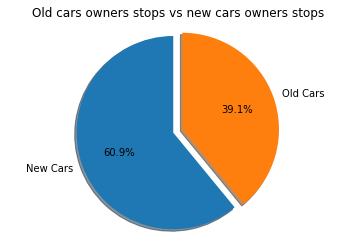

In [15]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'New Cars', 'Old Cars'
sizes = [df4, df5]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
ax1.set_title('Old cars owners stops vs new cars owners stops')

plt.show()

# Conclusion

Based on results we can draw conclusion that 60.9% of violated cars are new and 39.1% of them are old. 